# Exploratory data analysis

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [2]:
data_path = '../data/raw/car-data.csv'
df_raw = pd.read_csv(data_path, header=0)

### Info data

In [3]:
df_raw.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
df_raw.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


### General Analysis

In [6]:
def calc_stats(df, feature):
    """Calculate statistics for given feature in the dataset"""
    values = df[feature]
    print(f'Mean = {values.mean():.2f}')
    print(f'Std = {values.std():.2f}')
    print(f'Min = {values.min():.2f}')
    print(f'25th = {values.quantile(0.25):.2f}')
    print(f'50th = {values.median():.2f}')
    print(f'75th = {values.quantile(0.75):.2f}')
    print(f'Max = {values.max():.2f}')
    print(f'IQR = {(values.quantile(0.75) - values.quantile(0.25)):.2f}')
    return

##### Missing Features

In [7]:
mask_null = (df_raw == '') | (df_raw == '-') | (df_raw.isnull())
mask_null_percentage = (mask_null.mean() * 100).round(2)
mask_null_percentage

ID                   0.00
Price                0.00
Levy                30.25
Manufacturer         0.00
Model                0.00
Prod. year           0.00
Category             0.00
Leather interior     0.00
Fuel type            0.00
Engine volume        0.00
Mileage              0.00
Cylinders            0.00
Gear box type        0.00
Drive wheels         0.00
Doors                0.00
Wheel                0.00
Color                0.00
Airbags              0.00
dtype: float64

##### Feature selection

In [8]:
relevant_features = [
    'Manufacturer',
    'Model',
    'Prod. year',
    'Mileage',
    'Category',
    'Leather interior',
    'Fuel type',
    'Engine volume',
    'Cylinders',
    'Gear box type',
    'Drive wheels',
    'Doors',
    'Wheel',
    'Color',
    'Airbags',
    'Price'
]

df = df_raw[relevant_features]

##### Outliers

In [9]:
def find_outliers_numeric(df, feature, iqr_threshhold, min_value, max_value):
    """Find outliers from the dataset based on given feature and paremeters"""
    # Identify bounds
    values = df[feature]
    q25 = int(round(values.quantile(0.25)))
    q75 = int(round(values.quantile(0.75)))
    iqr_value = q75 - q25
    
    lower_bound = q25 - iqr_threshhold * iqr_value
    if lower_bound < min_value:
        lower_bound = min_value

    upper_bound = q75 + iqr_threshhold * iqr_value
    if upper_bound > max_value:
        upper_bound = max_value
        
    print(f'{lower_bound} < {feature} < {upper_bound}')
    
    # Identify outliers
    mask_outliers = (df[feature] < lower_bound) | (df[feature] > upper_bound)
    outliers = df[mask_outliers]
    
    total_data_points = len(df)
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / total_data_points) * 100
    print(f'Outlier for {feature}: {num_outliers} or {percentage_outliers:.2f}%')
    print(f'Before {total_data_points}, After {total_data_points - num_outliers}')
    
    return outliers

In [10]:
def find_outliers_categorical(df, feature, min_freq):
    """Find outliers for categorical feature under given minimum frequency"""
    counts = df[feature].value_counts()
    
    mask = df[feature].isin(counts[counts <= min_freq].index)
    outliers = df[mask]

    total_data_points = len(df)
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / total_data_points) * 100
    print(f'Outlier for {feature}: {num_outliers} or {percentage_outliers:.2f}%')
    
    return outliers

### Feature Analysis

##### Target Feature

In [11]:
feature = 'Price'
outliers_price = find_outliers_numeric(df, feature=feature, iqr_threshhold=7.5, min_value=1000, max_value=150_000)

1000 < Price < 147655.0
Outlier for Price: 2601 or 13.52%
Before 19237, After 16636


In [12]:
df = df.drop(outliers_price.index).reset_index(drop=True)

In [13]:
target_data = df[feature]

# Stats
mean_price = int(round(target_data.mean()))
std_price = int(round(target_data.std()))
min_price = int(round(target_data.min()))
q25 = int(round(target_data.quantile(0.25)))
median_price = int(round(target_data.median()))
q75 = int(round(target_data.quantile(0.75)))
max_price = int(round(target_data.max()))
iqr_value = q75 - q25

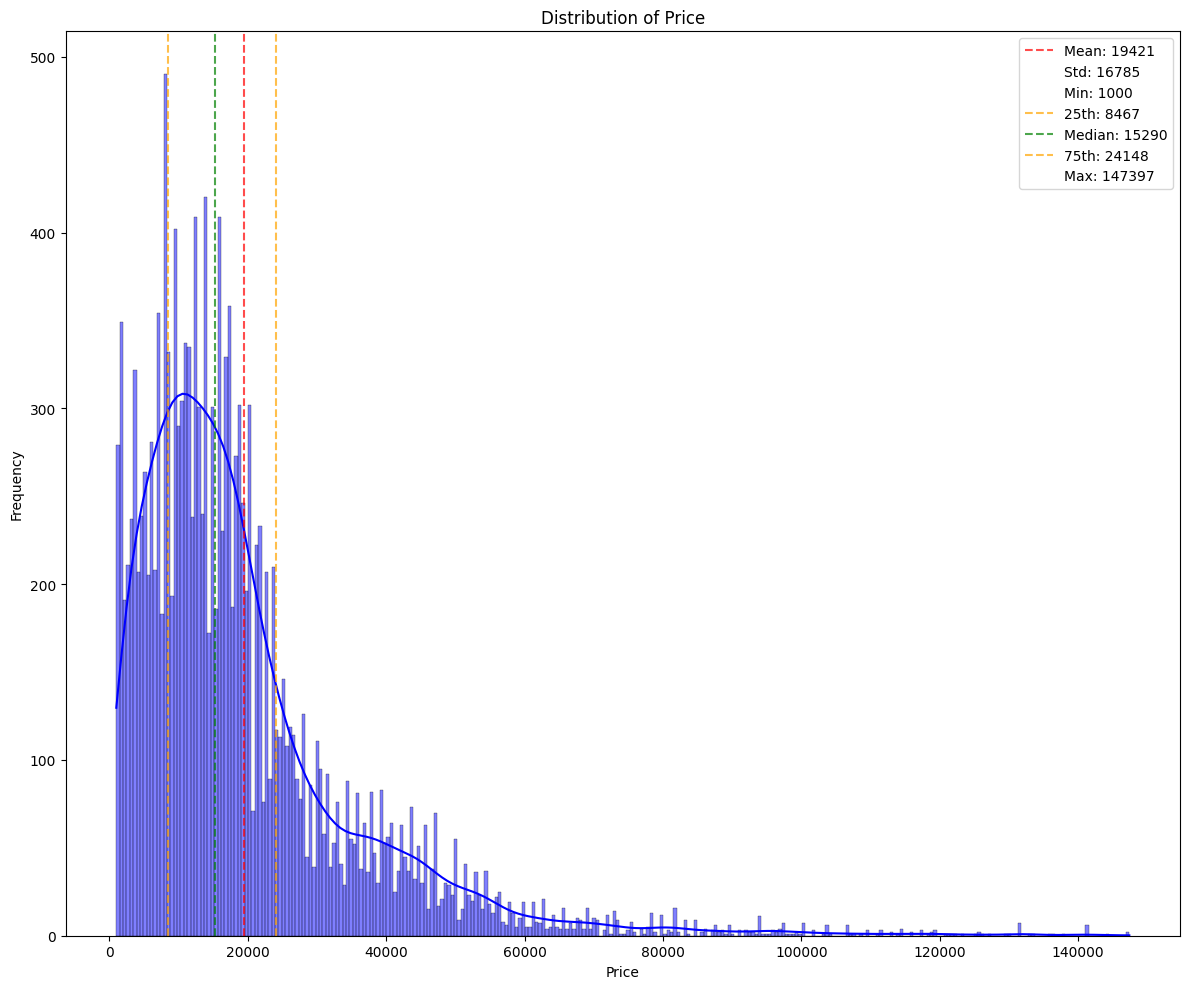

In [14]:
plt.figure(figsize=(12, 10))
sns.histplot(target_data, kde=True, color='blue', bins=300)

plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: {mean_price}', alpha=0.7)
plt.axvline(mean_price, color='gray', linestyle='--', label=f'Std: {std_price}', alpha=0)
plt.axvline(mean_price, color='gray', linestyle='--', label=f'Min: {min_price}', alpha=0)
plt.axvline(q25, color='orange', linestyle='--', label=f'25th: {q25}', alpha=0.7)
plt.axvline(median_price, color='green', linestyle='--', label=f'Median: {median_price}', alpha=0.7)
plt.axvline(q75, color='orange', linestyle='--', label=f'75th: {q75}', alpha=0.7)
plt.axvline(mean_price, color='gray', linestyle='--', label=f'Max: {max_price}', alpha=0)

plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

plt.tight_layout()
plt.legend()
plt.show()

##### Mileage

In [15]:
feature = 'Mileage'
df[feature] = df[feature].str.replace(' km', '').astype(int)

In [16]:
calc_stats(df, feature=feature)

Mean = 1548184.36
Std = 48560200.48
Min = 0.00
25th = 69000.00
50th = 123345.50
75th = 181906.50
Max = 2147483647.00
IQR = 112906.50


In [17]:
outliers_mileage = find_outliers_numeric(df, feature=feature, iqr_threshhold=3, min_value=0, max_value=600_000)

0 < Mileage < 520624
Outlier for Mileage: 218 or 1.31%
Before 16636, After 16418


In [18]:
df = df.drop(outliers_mileage.index).reset_index(drop=True)

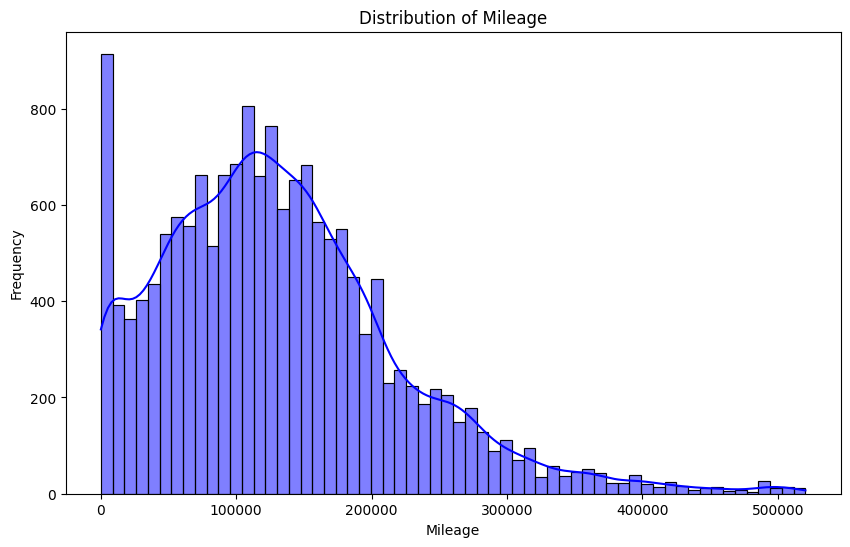

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature], kde=True, color='blue')
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

##### Manufacturer

In [20]:
feature = 'Manufacturer'
counts_make = df[feature].value_counts()
counts_make

Manufacturer
HYUNDAI          3445
TOYOTA           2955
MERCEDES-BENZ    1684
CHEVROLET         958
FORD              936
                 ... 
PONTIAC             1
SATURN              1
ASTON MARTIN        1
MOSKVICH            1
GREATWALL           1
Name: count, Length: 62, dtype: int64

In [21]:
outliers_make = find_outliers_categorical(df, feature, min_freq=5)

Outlier for Manufacturer: 39 or 0.24%


In [22]:
df = df.drop(outliers_make.index).reset_index(drop=True)

##### Model

In [23]:
feature = 'Model'
counts_model = df[feature].value_counts()
counts_model

Model
Sonata                     860
Prius                      852
Elantra                    849
Camry                      710
Santa FE                   522
                          ... 
Transit Connect ბენზინი      1
CLK 280                      1
FIT RS                       1
500 s                        1
Optima ex                    1
Name: count, Length: 1508, dtype: int64

In [24]:
outliers_model = find_outliers_categorical(df, feature, min_freq=3)

Outlier for Model: 1483 or 9.05%


In [25]:
df = df.drop(outliers_model.index).reset_index(drop=True)

##### Prod year

In [26]:
feature = 'Prod. year'
calc_stats(df, feature=feature)

Mean = 2011.04
Std = 5.42
Min = 1957.00
25th = 2009.00
50th = 2012.00
75th = 2015.00
Max = 2020.00
IQR = 6.00


In [27]:
outliers_prodyear = find_outliers_numeric(df, feature=feature, iqr_threshhold=7, min_value=1950, max_value=2025)

1967 < Prod. year < 2025
Outlier for Prod. year: 4 or 0.03%
Before 14896, After 14892


In [28]:
df = df.drop(outliers_prodyear.index).reset_index(drop=True)

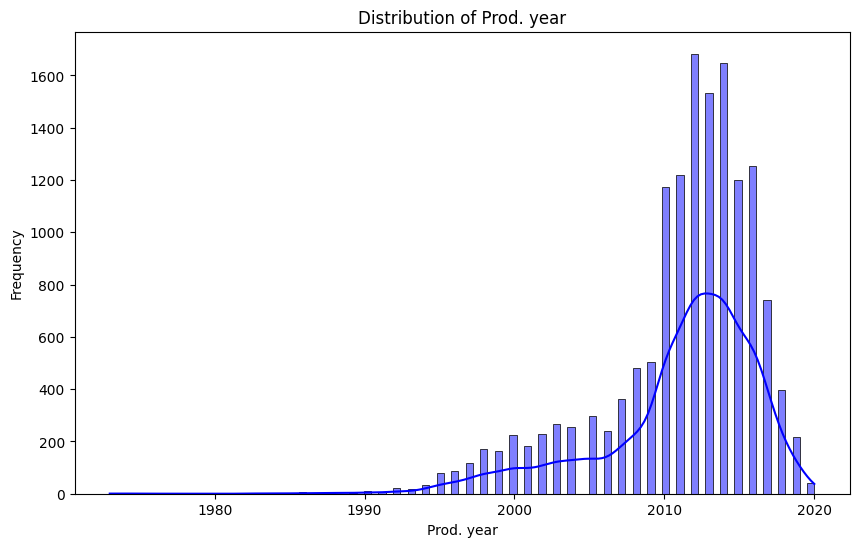

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature], kde=True, color='blue')
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

##### Body Category

In [30]:
feature = 'Category'
counts_body = df[feature].value_counts()
counts_body

Category
Sedan          6780
Jeep           4203
Hatchback      2172
Minivan         548
Coupe           381
Universal       321
Microbus        246
Goods wagon     189
Pickup           32
Cabriolet        16
Limousine         4
Name: count, dtype: int64

In [31]:
outliers_body = find_outliers_categorical(df, feature, min_freq=5)

Outlier for Category: 4 or 0.03%


In [32]:
df = df.drop(outliers_body.index).reset_index(drop=True)

##### Fuel type

In [33]:
feature = 'Fuel type'
counts_fuel = df[feature].value_counts()
counts_fuel

Fuel type
Petrol            7675
Diesel            3510
Hybrid            2499
LPG                727
CNG                403
Plug-in Hybrid      74
Name: count, dtype: int64

##### Engine volume

In [34]:
feature = 'Engine volume'
df[feature].value_counts()

Engine volume
2            3290
2.5          1783
1.8          1352
1.6          1329
1.5          1085
             ... 
6               1
0.7             1
6.7             1
3.7 Turbo       1
1.1 Turbo       1
Name: count, Length: 94, dtype: int64

In [35]:
df['isTurbo'] = df[feature].apply(lambda x: 'Yes' if 'Turbo' in x else 'No')
df['isTurbo'].value_counts()

isTurbo
No     13433
Yes     1455
Name: count, dtype: int64

In [36]:
df[feature] = df[feature].str.replace(' Turbo', '').astype(float)
calc_stats(df, feature=feature)

Mean = 2.24
Std = 0.82
Min = 0.00
25th = 1.70
50th = 2.00
75th = 2.50
Max = 20.00
IQR = 0.80


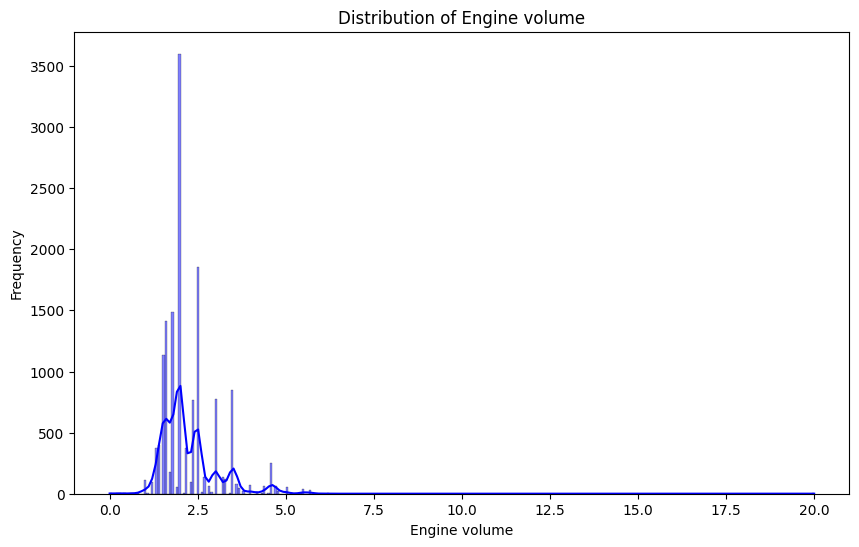

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature], kde=True, color='blue')
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

##### Cylinders

In [38]:
feature = 'Cylinders'
calc_stats(df, feature=feature)

Mean = 4.49
Std = 1.11
Min = 1.00
25th = 4.00
50th = 4.00
75th = 4.00
Max = 16.00
IQR = 0.00


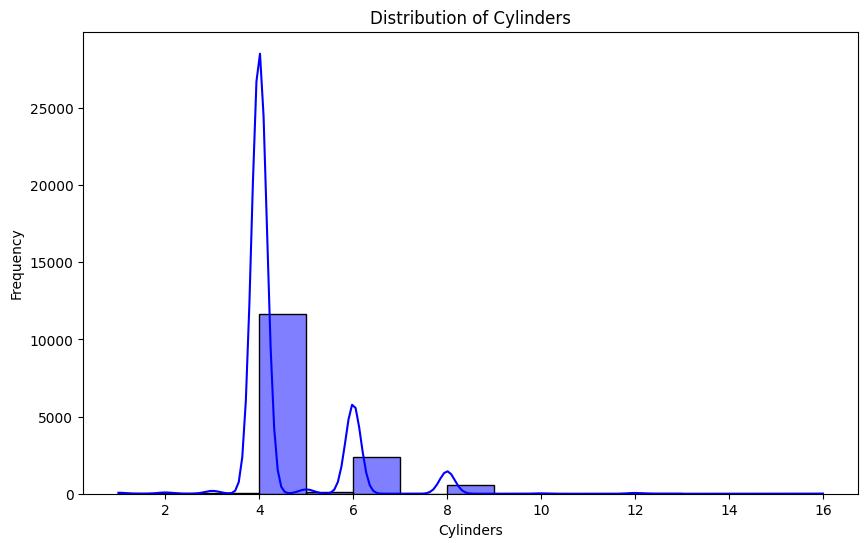

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature], kde=True, color='blue')
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

##### Gear box

In [40]:
feature = 'Gear box type'
counts_gear = df[feature].value_counts()
counts_gear

Gear box type
Automatic    10335
Tiptronic     2462
Manual        1435
Variator       656
Name: count, dtype: int64

##### Drive Wheels

In [41]:
feature = 'Drive wheels'
counts_wheels = df[feature].value_counts()
counts_wheels

Drive wheels
Front    10549
4x4       2700
Rear      1639
Name: count, dtype: int64

##### Doors

In [42]:
feature = 'Doors'
df[feature].value_counts()

Doors
04-May    14258
02-Mar      533
>5           97
Name: count, dtype: int64

In [43]:
# Remove this feature
df = df.drop(columns=[feature])

In [44]:
list(df.columns)

['Manufacturer',
 'Model',
 'Prod. year',
 'Mileage',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color',
 'Airbags',
 'Price',
 'isTurbo']

##### Wheel type

In [45]:
feature = 'Wheel'
counts_wheel_type = df[feature].value_counts()
counts_wheel_type

Wheel
Left wheel          13781
Right-hand drive     1107
Name: count, dtype: int64

##### Color

In [46]:
feature = 'Color'
counts_wheel_type = df[feature].value_counts()
counts_wheel_type

Color
Black            3732
White            3488
Silver           3106
Grey             1842
Blue             1091
Red               491
Green             238
Orange            158
Carnelian red     144
Brown             140
Golden            121
Beige              98
Sky blue           97
Yellow             93
Purple             30
Pink               19
Name: count, dtype: int64

##### Airbags

In [47]:
feature = 'Airbags'
calc_stats(df, feature=feature)

Mean = 6.31
Std = 4.09
Min = 0.00
25th = 4.00
50th = 4.00
75th = 12.00
Max = 16.00
IQR = 8.00


In [48]:
outliers_airbags = find_outliers_numeric(df, feature=feature, iqr_threshhold=3, min_value=0, max_value=20)
outliers_airbags

0 < Airbags < 20
Outlier for Airbags: 0 or 0.00%
Before 14888, After 14888


,Manufacturer,Model,Prod. year,Mileage,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price,isTurbo


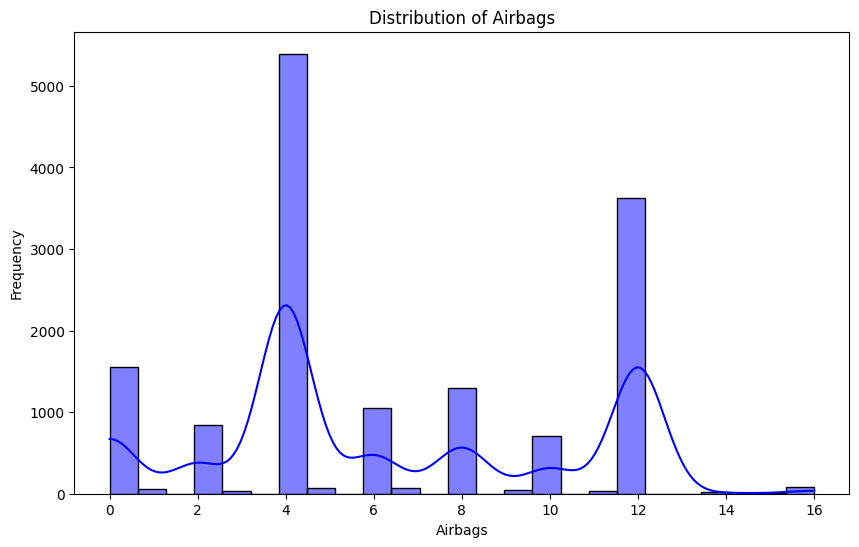

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature], kde=True, color='blue')
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

##### Leather interior

In [50]:
feature = 'Leather interior'
counts_interior = df[feature].value_counts()
counts_interior

Leather interior
Yes    10599
No      4289
Name: count, dtype: int64

### Set types

In [51]:
list(df.columns)

['Manufacturer',
 'Model',
 'Prod. year',
 'Mileage',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color',
 'Airbags',
 'Price',
 'isTurbo']

In [58]:
# Numerical
numerical_cols = ['Prod. year', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags', 'Price']
df[numerical_cols] = df[numerical_cols].astype(float)

In [59]:
# Categorical
categorical_cols = ['Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'isTrubo', 'Wheel', 'Color', 'Leather interior']
df[numerical_cols] = df[numerical_cols].astype(str)

In [60]:
len(df.columns) == (len(numerical_cols) + len(categorical_cols))

True

### Save processed dataset

In [61]:
processed_data_path = '../data/processed/car-data-processed.csv'
df.to_csv(processed_data_path, index=False)